In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [2]:
up = pd.read_excel("/content/UP_Daily.xlsx")

In [3]:
up.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4018 entries, 0 to 4017
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         4018 non-null   object 
 1   Temperature  4017 non-null   object 
 2   Humidity     4017 non-null   object 
 3    CPI         4018 non-null   float64
 4   Peak Load    3992 non-null   float64
dtypes: float64(2), object(3)
memory usage: 157.1+ KB


In [4]:
up['Date'] = pd.to_datetime(up['Date'])
up['Temperature'] = up['Temperature'].replace('-', np.nan).astype(float)
up['Humidity'] =up['Humidity'].replace('-', np.nan).astype(float)
up = up.dropna()
up.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3990 entries, 0 to 4017
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Date         3990 non-null   datetime64[ns]
 1   Temperature  3990 non-null   float64       
 2   Humidity     3990 non-null   float64       
 3    CPI         3990 non-null   float64       
 4   Peak Load    3990 non-null   float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 187.0 KB


In [5]:
up.head()

,Date,Temperature,Humidity,CPI,Peak Load
0,2013-04-01,25.8,52.0,24.8,8747.0
1,2013-04-02,27.7,46.0,24.8,8926.0
2,2013-04-03,28.4,42.0,24.8,8641.0
3,2013-04-04,26.3,40.0,24.8,8905.0
4,2013-04-05,26.2,35.0,24.8,9027.0


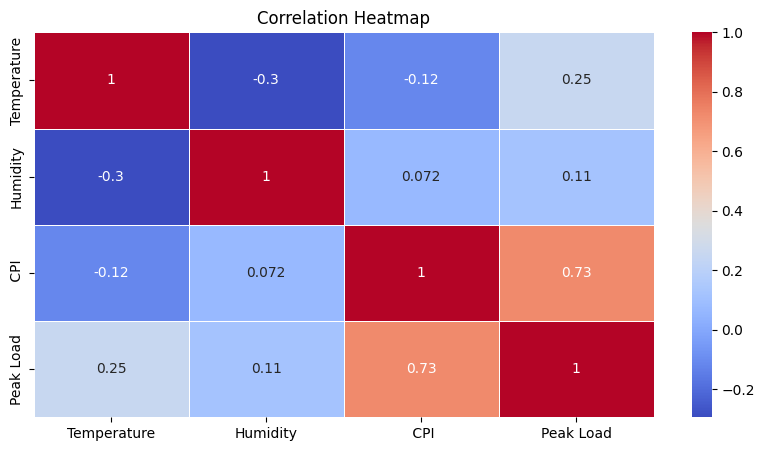

In [7]:
df=up[["Temperature","Humidity"," CPI","Peak Load"]]
# Calculate the correlation matrix, including 'Temperature' and 'Humidity'
corr_matrix = df.corr()

# Plot the heatmap
plt.figure(figsize=(10, 5))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

In [9]:
up=up[["Date","Peak Load"]]
up.head()

,Date,Peak Load
0,2013-04-01,8747.0
1,2013-04-02,8926.0
2,2013-04-03,8641.0
3,2013-04-04,8905.0
4,2013-04-05,9027.0


In [11]:
# Rename the columns to fit Prophet's requirements
up = up.rename(columns={'Date': 'ds', 'Peak Load': 'y'})

In [12]:
up.head()

,ds,y
0,2013-04-01,8747.0
1,2013-04-02,8926.0
2,2013-04-03,8641.0
3,2013-04-04,8905.0
4,2013-04-05,9027.0


In [13]:
up['ds'] = pd.to_datetime(up['ds'], format='%d-%m-%Y')

In [14]:
up.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3990 entries, 0 to 4017
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      3990 non-null   datetime64[ns]
 1   y       3990 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 93.5 KB


In [15]:
!pip install pandas prophet scikit-learn matplotlib
import matplotlib.pyplot as plt
from prophet import Prophet
from prophet.plot import add_changepoints_to_plot,plot_plotly,plot_components_plotly

<Axes: xlabel='ds'>

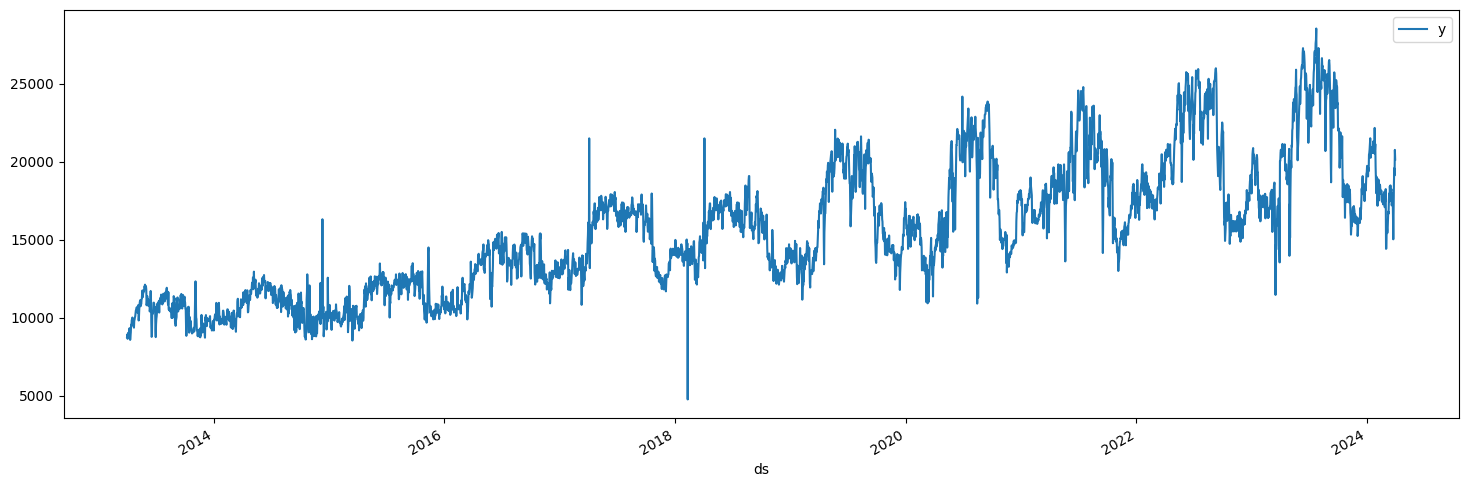

In [16]:
up.plot(x='ds',y='y',figsize=(18,6))

In [18]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(up, test_size=0.3, shuffle=False)

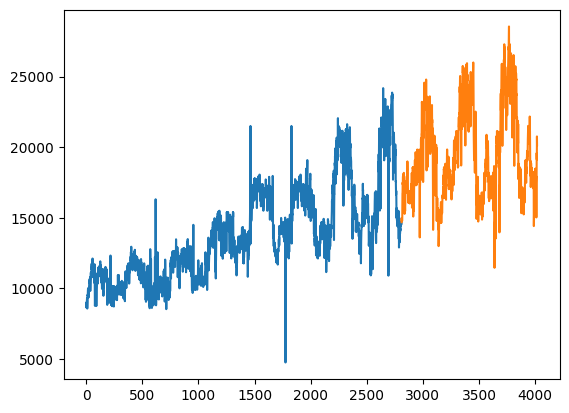

In [19]:
plt.plot(train['y'])
plt.plot(test['y'])

In [20]:
model = Prophet()
model.fit(train)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp51pz_dpc/now58fg0.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp51pz_dpc/au5xq6ww.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=81912', 'data', 'file=/tmp/tmp51pz_dpc/now58fg0.json', 'init=/tmp/tmp51pz_dpc/au5xq6ww.json', 'output', 'file=/tmp/tmp51pz_dpc/prophet_modelnp_woel0/prophet_model-20240825075543.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:55:43 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:55:44 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [21]:
train.tail()

,ds,y
2805,2020-12-05,14465.0
2806,2020-12-06,14689.0
2807,2020-12-07,14515.0
2808,2020-12-08,14791.0
2809,2020-12-09,14933.0


In [22]:
test.tail()

,ds,y
4013,2024-03-27,18569.0
4014,2024-03-28,19591.0
4015,2024-03-29,19125.0
4016,2024-03-30,20763.0
4017,2024-03-31,20147.0


In [23]:
future = model.make_future_dataframe(periods=len(test), freq='D')

In [24]:
forecast = model.predict(future)
forecast[['ds', 'yhat', 'yhat_lower',
          'yhat_upper', 'trend',
          'trend_lower', 'trend_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper,trend,trend_lower,trend_upper
3984,2024-03-16,18687.828008,13432.897640,24076.045363,20585.853157,15594.064439,25547.126132
3985,2024-03-17,18761.715320,13270.110667,23906.901619,20588.146683,15589.210601,25559.574794
3986,2024-03-18,18708.959199,13592.961767,24112.835063,20590.440209,15584.356762,25572.023456
3987,2024-03-19,18785.338912,13318.914439,24033.440728,20592.733735,15580.802923,25584.472118
3988,2024-03-20,18919.669855,13503.420839,24481.190212,20595.027262,15580.458263,25596.195451


In [25]:
forecast = model.predict(future)
# Extract only the predictions for the test period
forecast_test = forecast[['ds', 'yhat']].iloc[-len(test):].reset_index(drop=True)
test = test.reset_index(drop=True)

In [26]:
# Combine the actual values and predicted values
results = pd.concat([test, forecast_test['yhat']], axis=1)
results = results.rename(columns={'yhat': 'predicted'})

In [27]:
# Handle NaN values before calculating metrics
results = results.dropna(subset=['y', 'predicted'])

# Calculate accuracy metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
mae = mean_absolute_error(results['y'], results['predicted'])
mse = mean_squared_error(results['y'], results['predicted'])
rmse = np.sqrt(mse)

mape = mean_absolute_percentage_error(results['y'], results['predicted'])
print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'MAPE: {mape * 100}%')  # Convert MAPE to percentage
print(f'Accuracy: {100 - (mape *100)}%')

MAE: 1765.5657606424566
MSE: 4990676.294111364
RMSE: 2233.9821606519968
MAPE: 8.799263753162148%
Accuracy: 91.20073624683785%


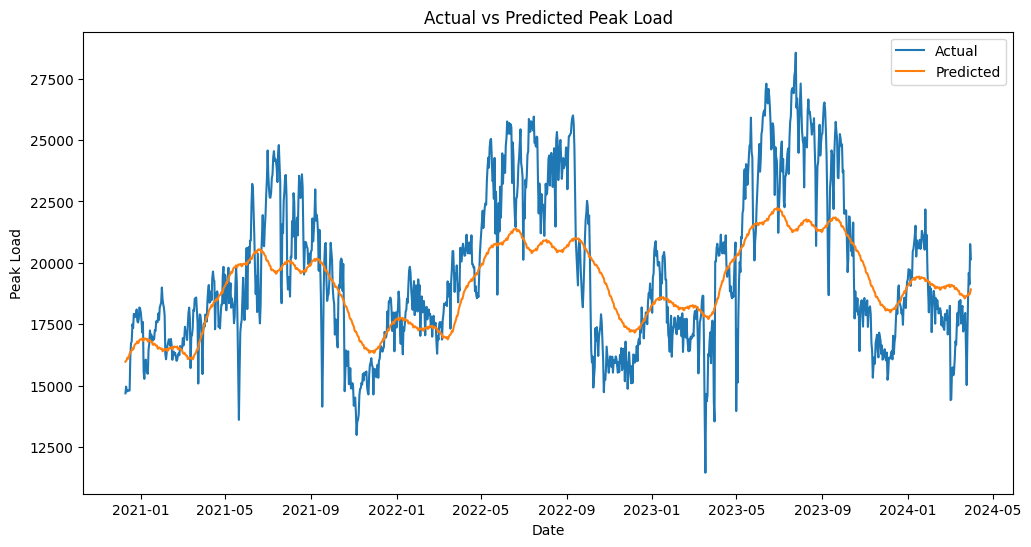

In [28]:
# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(results['ds'], results['y'], label='Actual')
plt.plot(results['ds'], results['predicted'], label='Predicted')
plt.xlabel('Date')
plt.ylabel('Peak Load')
plt.title('Actual vs Predicted Peak Load')
plt.legend()
plt.show()

In [29]:
results.to_csv('actual vs predicted.csv',index=False)

In [30]:
future_unknown = model.make_future_dataframe(periods=365 * 4 ,
                                            freq='D')

In [31]:
forecast_unknown = model.predict(future_unknown)
forecast_unknown[['ds', 'yhat', 'yhat_lower',
          'yhat_upper', 'trend',
          'trend_lower', 'trend_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper,trend,trend_lower,trend_upper
4247,2024-12-04,19061.497224,12518.664710,26506.706014,21189.050553,14278.025852,28284.743928
4248,2024-12-05,19099.914670,12308.687775,26427.854739,21191.344079,14271.435967,28296.854671
4249,2024-12-06,19121.241916,12418.397124,26450.669823,21193.637605,14264.846082,28308.965413
4250,2024-12-07,19157.312619,12363.363955,26820.869982,21195.931132,14258.256197,28321.076156
4251,2024-12-08,19237.836948,12264.380954,26441.226171,21198.224658,14251.666313,28330.363016


/usr/local/lib/python3.10/dist-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/usr/local/lib/python3.10/dist-packages/prophet/plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


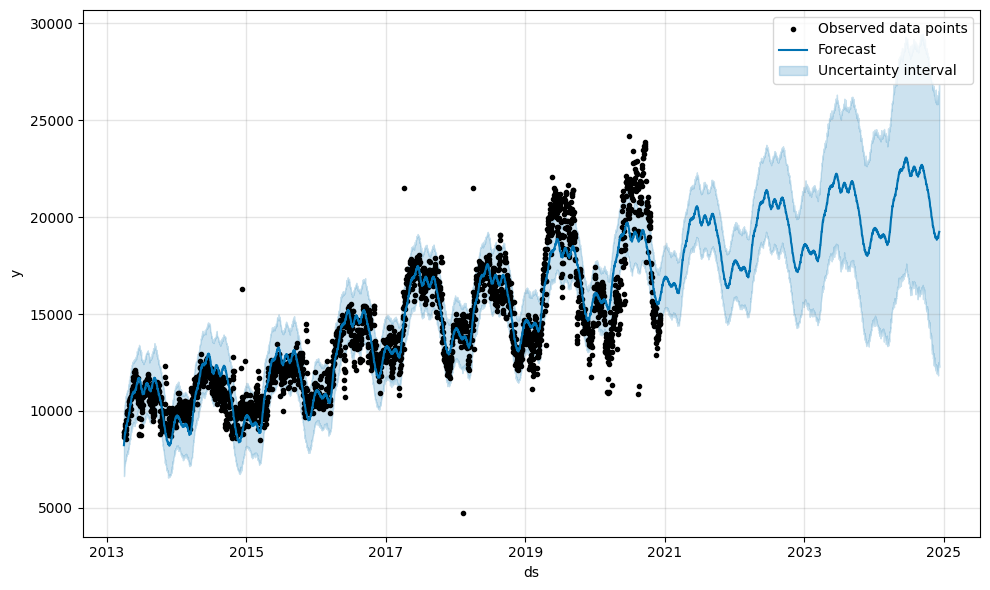

In [32]:
fig1 = model.plot(forecast_unknown, include_legend=True)

/usr/local/lib/python3.10/dist-packages/prophet/plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/usr/local/lib/python3.10/dist-packages/prophet/plot.py:351: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  df_y['ds'].dt.to_pydatetime(), seas[name], ls='-', c='#0072B2')
/usr/local/lib/python3.10/dist-packages/prophet/plot.py:354: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` o

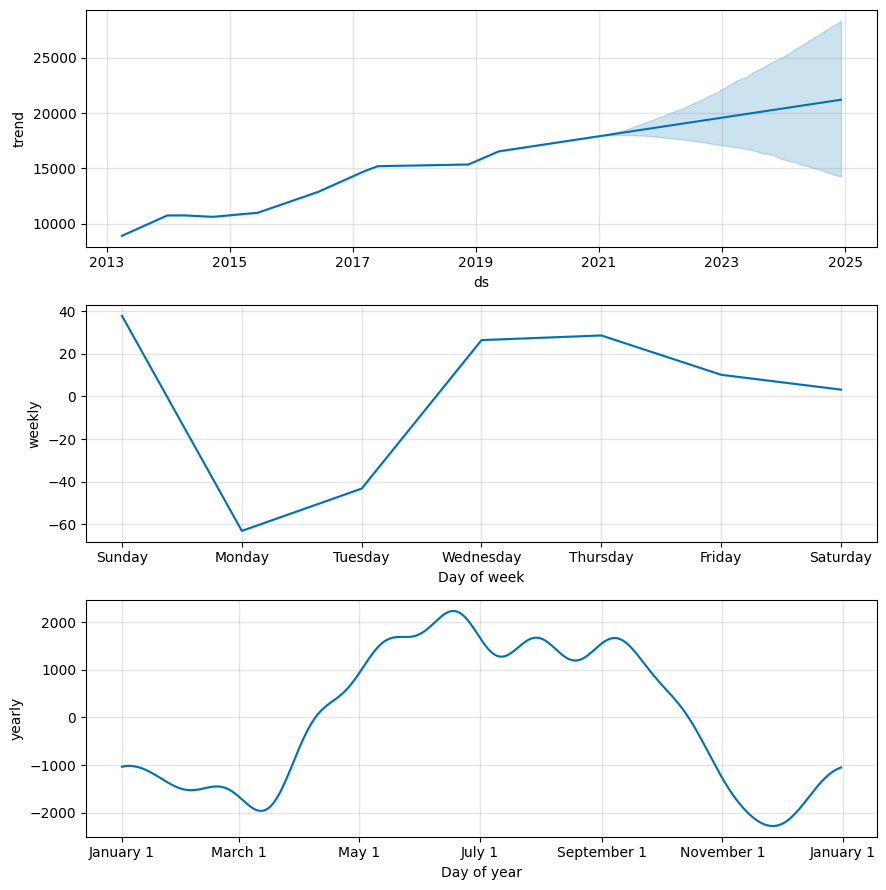

In [33]:
fig2 = model.plot_components(forecast_unknown)

/usr/local/lib/python3.10/dist-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/usr/local/lib/python3.10/dist-packages/prophet/plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


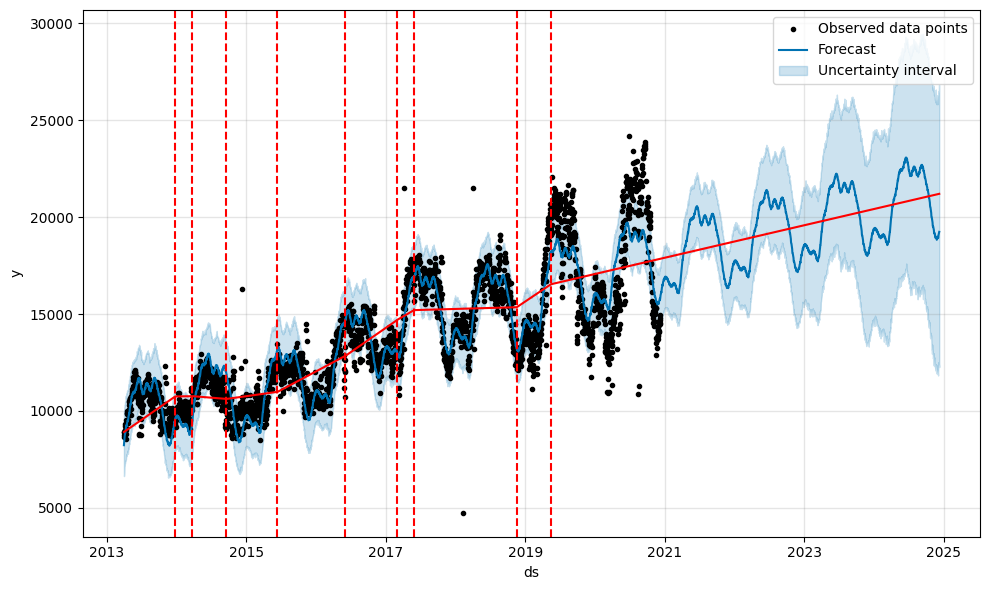

In [34]:
fig = model.plot(forecast_unknown,include_legend=True)
a = add_changepoints_to_plot(fig.gca(),
                             model, forecast_unknown)

In [ ]:
train.to_csv('train.csv', index=False)
test.to_csv('test.csv', index=False)
forecast_test.to_csv('forecast_test.csv', index=False)
forecast_unknown.to_csv('forecast_unknown.csv', index=False)